In [34]:
# 📦 Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# 📂 Load the dataset
data_path = "student_engagement_data.csv"
students_data = pd.read_csv(data_path)

# Convert date column to datetime format right after loading
students_data['Date'] = pd.to_datetime(students_data['Date'])

# Quick check of dataset dimensions
print(f"Dataset contains {students_data.shape[0]} rows and {students_data.shape[1]} columns.")


Dataset contains 10000 rows and 10 columns.


In [36]:
# ℹ️ Dataset Overview
print("=== Dataset Information ===")
display(students_data.info())

print("\n=== Summary Statistics (All Columns) ===")
display(students_data.describe(include='all'))

# Checking for missing values
print("\n=== Missing Values per Column ===")
display(students_data.isna().sum())


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Student ID                10000 non-null  int64         
 1   Session ID                10000 non-null  int64         
 2   Date                      10000 non-null  datetime64[ns]
 3   EEG Data (PSD Features)   10000 non-null  object        
 4   Engagement Level          10000 non-null  object        
 5   Attention Level           10000 non-null  object        
 6   Internet Connectivity     10000 non-null  object        
 7   Adaptivity Level          10000 non-null  object        
 8   Learning Mode Prediction  10000 non-null  object        
 9   Performance Metrics       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 781.4+ KB


None


=== Summary Statistics (All Columns) ===


,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
count,10000.00000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000
unique,NaN,NaN,NaN,10000,3,3,3,3,3,NaN
top,NaN,NaN,NaN,"[0.02336871035675725, 0.14892576656473, 0.4845...",Low,Moderate,Moderate (Wi-Fi),Moderate,Kinesthetic Learner,NaN
freq,NaN,NaN,NaN,1,3366,3385,3389,3360,3374,NaN
mean,5000.50000,149.762700,2025-01-15 14:55:49.440000,NaN,NaN,NaN,NaN,NaN,NaN,74.674300
min,1.00000,100.000000,2025-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,50.000000
25%,2500.75000,125.000000,2025-01-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,62.000000
50%,5000.50000,150.000000,2025-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,75.000000
75%,7500.25000,174.000000,2025-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,87.000000
max,10000.00000,199.000000,2025-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,99.000000



=== Missing Values per Column ===


Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

In [37]:
# Count Overall Learning Modes
print("\nLearning Mode Counts:")
print(students_data['Learning Mode Prediction'].value_counts())



Learning Mode Counts:
Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64


In [38]:
def level_to_score(level):
    if level == "Low":
        return 1
    elif level == "Moderate":
        return 2
    elif level == "High":
        return 3
    else:
        return None

students_data["Engagement Level"] = students_data["Engagement Level"].apply(level_to_score)
students_data["Attention Level"] = students_data["Attention Level"].apply(level_to_score)

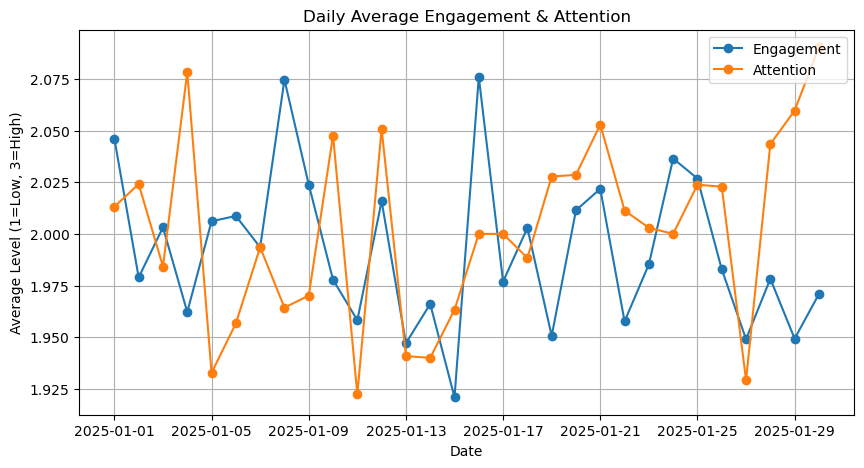

In [39]:
# Daily average Engagement & Attention Levels
plt.figure(figsize=(10,5))
daily_avg = students_data.groupby('Date')[['Engagement Level', 'Attention Level']].mean()
plt.plot(daily_avg.index, daily_avg["Engagement Level"], label="Engagement",marker ="o")
plt.plot(daily_avg.index, daily_avg["Attention Level"], label="Attention",marker ="o")
plt.xlabel("Date")
plt.ylabel("Average Level (1=Low, 3=High)")
plt.title("Daily Average Engagement & Attention")
plt.legend()
plt.grid(True)
plt.show()

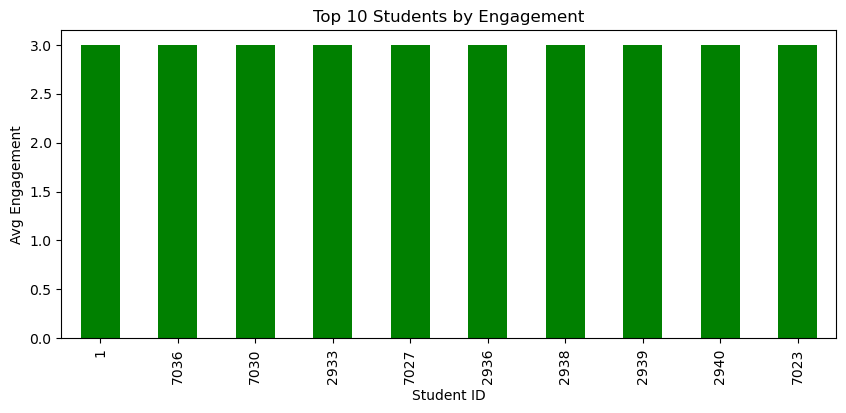

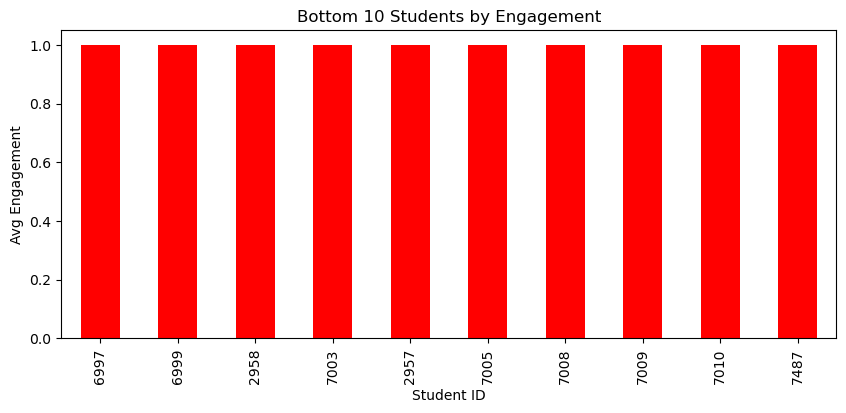

In [40]:
# 🏆 Most & Least Engaged Students
student_avg_eng = students_data.groupby('Student ID')['Engagement Level'].mean().sort_values(ascending=False)

# Top 10
plt.figure(figsize=(10,4))
student_avg_eng.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Students by Engagement')
plt.ylabel('Avg Engagement')
plt.show()

# Bottom 10
plt.figure(figsize=(10,4))
student_avg_eng.tail(10).plot(kind='bar', color='red')
plt.title('Bottom 10 Students by Engagement')
plt.ylabel('Avg Engagement')
plt.show()


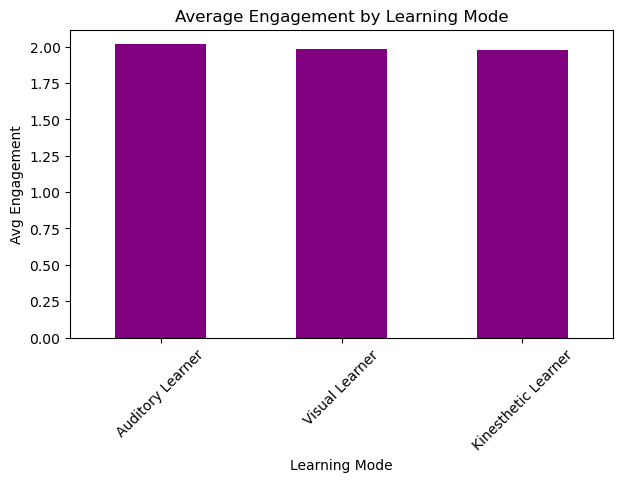

In [41]:
# 📚 Engagement by Learning Mode
mode_engagement = students_data.groupby('Learning Mode Prediction')['Engagement Level'].mean().sort_values(ascending=False)

# Plot
mode_engagement.plot(kind='bar', color='purple', figsize=(7,4))
plt.title('Average Engagement by Learning Mode')
plt.ylabel('Avg Engagement')
plt.xlabel('Learning Mode')
plt.xticks(rotation=45)
plt.show()
